### Butler Volmer Explicit Equations error
This brief study will show which explicit model for BV equation for Vactivation calculation is the closest to the actual BV. 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [2]:
import IV_model

In [3]:
IV_model.IV_new_2

<function IV_model.IV_new_2(oT, fT, J, pO2air, pN2air, pH2, pH2O, pCO, pCO2, pCH4, pN2, pSys, BV_alpha, BV_prexp, BV_Eact, V_loss=0.0, R_cont=0.0, DsurfH2th1=0.1, DsurfH2th2=4.51e-05, Fkn=True, d0_am=0.28, d0_cm=0.28, th_e=10)>

In [4]:
#enviornment parameter

oT =700+273.15      #Temperature oxidant (K)
fT =700+273.15      #Temperature fuel (K)

Tk = (oT+fT)/2
# environment parameters
R=8.314
F=96485.0

pO2air=0.3          #Air side partial pressure O2 (atm)
pN2air =0.7         #Air side partial pressure N2 (atm)
# pH2 = 0.4375        #Fuel side partial pressure H2 (atm)
# pH2O =0.3125        #Fuel side partial pressure H2O (atm)
# pCO=0.0625          #Fuel side partial pressure CO (atm)
# pCO2=0.0625         #Fuel side partial pressure CO2 (atm)
# pCH4=0.125          #Fuel side partial pressure CH4 (atm)
# pN2=0.0             #Fuel side partial pressure N2 (atm)
pH2 = 0.97        #Fuel side partial pressure H2 (atm)
pH2O =0.03        #Fuel side partial pressure H2O (atm)
pCO=0.0         #Fuel side partial pressure CO (atm)
pCO2=0.0         #Fuel side partial pressure CO2 (atm)
pCH4=0.0          #Fuel side partial pressure CH4 (atm)
pN2=0.0             #Fuel side partial pressure N2 (atm)
pSys=1.0            #System pressure (atm)  

# adjustable parameters for B-V loss (starting with these for optimization)
BV_alpha = 0.43236 #0.43236/3 **
BV_prexp = 5639 #**
BV_Eact = 79.616 #**


J=0.1

In [5]:
# Model Parameters. Defined by optimization functions
# BV_alpha, BV_prexp, BV_Eact,V_loss=0.0, R_cont=0.0, d0_am=0.28,d0_cm=0.28, 

J3 = (1.68334655e-01,  5.63899994e+03,  7.96160000e+04, -4.40787208e-02,
        2.19644090e-01,  2.00000000e-01,  2.79458248e-01)

B3 = [2.69218132e-01,  5.63900045e+03,  7.96160002e+04, -5.97469329e-02,
        0.00000000e+00,  2.00000000e+00,  3.62167047e-01]

J3_5 = [7.00000000e-01,  1.00000846e+00,  2.00000485e+02, -2.60802600e-02,
        5.32689266e-01,  2.00000000e-01,  2.79295936e-01]

B3_5 = [7.00000000e-01,  1.00000846e+00,  2.00000485e+02, -2.60802600e-02,
        5.32689266e-01,  2.00000000e-01,  2.79295936e-01]

J4 = [6.00000000e-01,  5.63899995e+03,  7.96160000e+04, -8.11476134e-02,
        3.99214619e-01,  2.00000000e-01,  2.27425977e-01]

B4 = [6.00000000e-01,  4.99999988e+03,  7.00000001e+04, -1.96831760e-01,
        3.56237271e-02,  2.00000000e-01,  2.29666245e-01]

J5 = [6.00000000e-01,  5.63899995e+03,  7.96160000e+04, -8.24174358e-02,
        4.05113768e-01,  2.32356931e-01,  2.79653913e-01]
B5 = [3.72932228e-01,  5.63899993e+03,  7.96160001e+04, -1.36362672e-01,
        8.76092882e-03,  2.00000000e-01,  2.29482770e-01]
     

In [46]:
#user defined
Toper=650

In [47]:
#Current Density JM
filename_JM = './ExperimentalData/JM2017/'+str(Toper)+'.csv'
data_JM = np.loadtxt(open(filename_JM, "rb"), delimiter=",", skiprows=1)
J_JM = data_JM[:,0]
#ToperJM = data_JM[:,2]
y_JM = data_JM[:,1]

filename_BP = './ExperimentalData/BP2020/AllData_BP.csv'
data_BP = np.loadtxt(open(filename_BP, "rb"), delimiter=",", skiprows=1)
J_BP = data_BP[:,0]
ToperBP = data_BP[:,2]
y_BP = data_BP[:,1]
#    plt.plot(data[:,0], data[:,1], colorlist[i]+markerlist[i], label = 'EXP '+str(Tlist[i]))


In [48]:
BV_3J = np.zeros(len(J_JM))
BV_3_5J = np.zeros(len(J_JM))
BV_4J = np.zeros(len(J_JM))
BV_5J = np.zeros(len(J_JM))

In [54]:
for i in range(len(BV_3J)):
    V_JM= IV_model.IV_new_3(Toper+273.15,Toper+273.15,J_JM[i],
                    pO2air,pN2air,pH2,pH2O,pCO,pCO2,pCH4,pN2,pSys,
                    J3[0], J3[1], J3[2],
                    J3[3], J3[4], 0.1, 4.51e-5,
                    True,J3[5],J3[6])
    BV_3J[i]=V_JM[3]

In [55]:
for i in range(len(BV_3_5J)):
    V_JM= IV_model.IV_new_3_5(Toper+273.15,Toper+273.15,J_JM[i],
                    pO2air,pN2air,pH2,pH2O,pCO,pCO2,pCH4,pN2,pSys,
                    J3_5[0], J3_5[1], J3_5[2],
                    J3_5[3], J3_5[4], 0.1, 4.51e-5,
                    True,J3_5[5],J3_5[6])
    BV_3_5J[i]=V_JM[3]

In [56]:
for i in range(len(BV_4J)):
    V_JM= IV_model.IV_new_4(Toper+273.15,Toper+273.15,J_JM[i],
                    pO2air,pN2air,pH2,pH2O,pCO,pCO2,pCH4,pN2,pSys,
                    J4[0], J4[1], J4[2],
                    J4[3], J4[4], 0.1, 4.51e-5,
                    True,J4[5],J4[6])
    BV_4J[i]=V_JM[3]

In [57]:
for i in range(len(BV_5J)):
    V_JM= IV_model.IV_new_5(Toper+273.15,Toper+273.15,J_JM[i],
                    pO2air,pN2air,pH2,pH2O,pCO,pCO2,pCH4,pN2,pSys,
                    J5[0], J5[1], J5[2],
                    J5[3], J5[4], 0.1, 4.51e-5,
                    True,J5[5],J5[6])
    BV_5J[i]=V_JM[3]

In [71]:


Vact = np.linspace(0,0.5,20)
J=np.zeros(len(Vact))
BV_prexp=5639/5000
BV_Eact=79616/10000
BV_alpha=0.43236
i0=BV_prexp*math.exp(-BV_Eact)

for i in range(len(J)):
    J[i]=-i0*(math.exp(-BV_alpha*2*Vact[i]*F/R/Tk)-math.exp((1-BV_alpha)*Vact[i]*2*F/R/Tk))


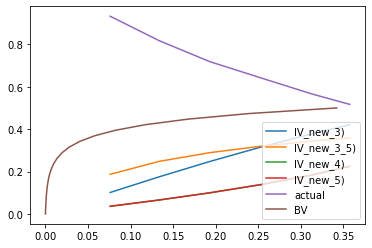

In [72]:
fig = plt.figure()

plt.plot(J_JM, BV_3J, label='IV_new_3)')
plt.plot(J_JM, BV_3_5J, label='IV_new_3_5)')
plt.plot(J_JM, BV_4J, label='IV_new_4)')
plt.plot(J_JM, BV_5J, label='IV_new_5)')
plt.plot(J_JM, y_JM, label='actual')
plt.plot(J, Vact, label= 'BV')
plt.legend(loc='lower right')


In [12]:

BV_2=IV_model.IV_new_3(oT,fT,J,pO2air,pN2air,pH2,pH2O,pCO,pCO2,pCH4,pN2,pSys,
            BV_alpha, BV_prexp, BV_Eact,V_loss=0.0, R_cont=0.0, 
            DsurfH2th1=0.1, DsurfH2th2=4.51e-5,Fkn=True, d0_am=0.28,d0_cm=0.28, th_e=10)

BV_2[3]

1.7368082674012347e-06

In [13]:

BV_3=IV_model.IV_new_3_5(oT,fT,J,pO2air,pN2air,pH2,pH2O,pCO,pCO2,pCH4,pN2,pSys,
            BV_alpha, BV_prexp, BV_Eact,V_loss=0.0, R_cont=0.0, 
            DsurfH2th1=0.1, DsurfH2th2=4.51e-5,Fkn=True, d0_am=0.28,d0_cm=0.28, th_e=10)

BV_3[3]

0.24304878622009748

In [14]:

BV_4=IV_model.IV_new_4(oT,fT,J,pO2air,pN2air,pH2,pH2O,pCO,pCO2,pCH4,pN2,pSys,
            BV_alpha, BV_prexp, BV_Eact,V_loss=0.0, R_cont=0.0, 
            DsurfH2th1=0.1, DsurfH2th2=4.51e-5,Fkn=True, d0_am=0.28,d0_cm=0.28, th_e=10)

BV_4[3]

1.5018510257508408e-06

In [15]:

BV_5=IV_model.IV_new_5(oT,fT,J,pO2air,pN2air,pH2,pH2O,pCO,pCO2,pCH4,pN2,pSys,
            BV_alpha, BV_prexp, BV_Eact,V_loss=0.0, R_cont=0.0, 
            DsurfH2th1=0.1, DsurfH2th2=4.51e-5,Fkn=True, d0_am=0.28,d0_cm=0.28, th_e=10)

BV_5[3]

1.5018510257508408e-06

In [16]:
i0=BV_prexp*math.exp(-BV_Eact)
i0
print(math.exp(-79.6))
i0

2.692521875959929e-35


1.494213388186166e-31

[1.95399443e-06 3.42618203e-06 4.95190373e-06 6.50439245e-06
 8.03011412e-06 9.18109717e-06 2.67670505e-08 1.92722738e-06
 3.42618203e-06 4.92513668e-06 6.47762540e-06 8.00334707e-06
 9.52906877e-06 1.10547904e-05 1.25805121e-05 1.37314952e-05
 0.00000000e+00 1.90046036e-06 3.42618203e-06 4.95190373e-06
 6.50439245e-06 8.03011412e-06 9.52906877e-06 1.10815575e-05
 1.25805121e-05 1.41062338e-05 1.56051885e-05 1.71576772e-05
 1.82818932e-05 0.00000000e+00 1.92722738e-06 3.42618203e-06
 4.95190373e-06 6.47762540e-06 7.97658005e-06 9.52906877e-06
 1.10547904e-05 1.25537451e-05 1.40794668e-05 1.56319555e-05
 1.71576772e-05 1.86566318e-05 1.99146830e-05 0.00000000e+00
 1.95399443e-06 3.45294908e-06 4.95190373e-06 6.50439245e-06
 8.03011412e-06 9.55583582e-06 1.11083245e-05 1.26072792e-05
 1.41330009e-05 1.56319555e-05 1.71844442e-05 1.87101659e-05
 2.02091205e-05 2.15474729e-05]


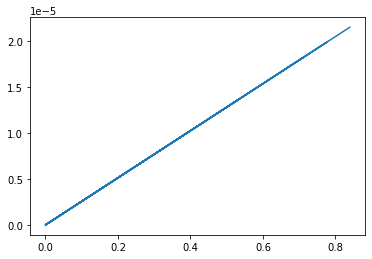

In [17]:
#PNNL Original Model
BV_prexp=9.6620275
BV_Eact=3.35955954
BV_alpha=0.48646415
i0=BV_prexp*math.exp(-BV_Eact)
BV=np.zeros(len(J_JM))

for i in range(len(J_JM)):
    BV[i]=(R*Tk/BV_alpha/F)*math.log((J_JM[i]/2.0/(i0*10000))+math.sqrt((J_JM[i]/2.0/(i0*10000))**2+1))

print(BV)

plt.plot(J_JM,BV)

In [18]:
#Same as PNNL original model in hyperbolic #perform speed testing on the calculation
i0=BV_prexp*math.exp(-BV_Eact/R/Tk)

BV=np.zeros(len(J))

for i in range(len(J)):
    BV[i]=(R*Tk/BV_alpha/F)*math.asinh(J[i]/2/i0)
    
plt.plot(J,BV)

TypeError: object of type 'float' has no len()

In [ ]:
#Hyperbolic sine equation. Meng.et
Eact_a = 1e5
BV_alpha=7.00000000e-01
Prex_A=1.08110742e+00
Prex_C=2.36148376e+02
pH2= 0.97
pH2O= 0.03
pSys= 1
Keq_dHo=-56930.0
Keq_A=6.75
Keq_B=-0.64
Keq_C=-0.08
Keq_L=-8.74
Keq_dG=Keq_dHo+Keq_A*Tk*math.log10(Tk)+Keq_B*Tk*Tk/1000+Keq_C*100000/Tk+Keq_L*Tk
Kequib=math.exp(-Keq_dG*4.184/R/Tk)
pO2anode=(pH2O/Kequib/pH2)**2

i0a=Prex_A*1e10*((pH2*pH2O)/pSys**2)*math.exp(-Eact_a/R/Tk) #prex_a = 1.344 (e10)
#i0=BV_prexp*math.exp(-BV_Eact/R/Tk)
Eact_c = 1.2e5
i0c=Prex_C*1e9*(pO2anode/pSys)**(0.25)*math.exp(-Eact_c/R/Tk) #prex_c = 2.051 (e9)

for i in range(len(J)):
    Vact_a=(R*Tk/BV_alpha/F)*math.asinh(J[i]/2/i0a)
    Vact_c=(R*Tk/BV_alpha/F)*math.asinh(J[i]/2/i0c)
    BV[i]=Vact_a+Vact_c
plt.plot(J,BV)

In [ ]:
#second expansion
i0=BV_prexp*math.exp(-BV_Eact/R/Tk)
#BV=(R*Tk/BV_alpha/F)*math.asinh(J/2/i0)
#Using quadratic formula derived from 2nd order taylor expansion.
AA=(F/R/Tk)**2*(-2*BV_alpha+1)*0.5
BB= F/R/Tk
CC=-J/i0
BV=np.zeros(len(CC))
for i in range(len(CC)):
    BV[i]= (-BB+math.sqrt((BB**2)-4*AA*CC[i]))/(2*AA)

plt.plot(J,BV)
    
#explicit Vact from 2nd order Taylor expansion
#BV=(-BB+math.sqrt((BB**2)-4*AA*CC))/(2*AA)

In [ ]:
#Original BV equation ranging Vact from 0 to 0.25

BV_prexp=9.6620275/10
BV_Eact=3.35955954
BV_alpha=0.48646415
i0=BV_prexp*math.exp(-BV_Eact)
Vact = np.linspace(0,1,1000)
J=np.zeros(len(Vact))

for i in range(len(J)):
    J[i]=-i0*(math.exp(-BV_alpha*2*Vact[i]*F/R/Tk)-math.exp((1-BV_alpha)*Vact[i]*2*F/R/Tk))

plt.plot(J,Vact)

In [ ]:
Vact=0.2
Tk=oT
J=-i0*(math.exp(-BV_alpha*2*Vact*F/R/Tk)-math.exp((1-BV_alpha)*Vact*2*F/R/Tk))
J

In [ ]:
#second expansion+tafel\]

i0=BV_prexp*math.exp(-BV_Eact/R/Tk)
if J/i0 < 4:
#BV=(R*Tk/BV_alpha/F)*math.asinh(J/2/i0)
#Using quadratic formula derived from 2nd order taylor expansion.
    AA=(F/R/Tk)**2*(-2*BV_alpha+1)*0.5
    BB= F/R/Tk
    CC=-J/i0
    #explicit Vact from 2nd order Taylor expansion
    BV=(-BB+math.sqrt((BB**2)-4*AA*CC))/(2*AA)

In [ ]:
# plot exp data
#filename = './ExperimentalData/JM2017/700.csv'
#filename = './ExperimentalData/BP2020/AllData_BP.csv'
filename = './ExperimentalData/BP2020/t8/700.csv'
data = np.loadtxt(open(filename, "rb"), delimiter=",", skiprows=1)
plt.plot(data[:,0], data[:,1], 'r'+'o', label = 'EXP '+str(700)) #J vs V

# initialize Jlist and Vlist
Jlist=np.linspace(np.amin(data[:,0]), np.amax(data[:,0]), num=20)   #Current density, unit [A/cm2]
Vlist = np.zeros(20)
####Needs to be completed
# plot pred data
for j in range(20):
    Vlist[j], Voc, Ohmic, BV, Cath, Anode = IV_model.IV_new_2(oT,fT,Jlist[j],pO2air,pN2air,pH2,pH2O,pCO,pCO2,pCH4,pN2,pSys,
                                                   result.x[0],result.x[1],result.x[2],
                                                   result.x[3], result.x[4], 0.1, 4.51e-5,
                                                   True,result.x[5],result.x[6])
plt.plot(Jlist, Vlist, 'r' +'-', label = 'IV Pred '+str(700))

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.xlim(-0.1, 1.1)
plt.ylim(0.4, 1.1)
# ymin, ymax = plt.ylim()
# plt.ylim(ymin-(ymax-ymin)*0.0, ymax+(ymax-ymin)*0.0)
plt.xlabel('Current Density, J [A/cm2]', fontsize = 15)
plt.ylabel('Voltage, V [V]', fontsize = 15)
plt.title('EXP. VS. IV_new', fontsize = 15)